<a href="https://colab.research.google.com/github/ahsan870/ML-python-projects/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning project

# **Load Data**



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

# Data Preparation

### Data sepration as X and Y

In [ ]:
y = df['logS']
y

In [ ]:
X = df.drop('logS', axis=1)
X

#### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [ ]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
315,3.22060,194.274,5.0,0.428571
134,3.07860,114.232,1.0,0.000000
164,2.68850,100.205,2.0,0.000000
363,-0.85610,222.251,2.0,0.384615
101,0.67310,89.094,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
420,4.41100,216.283,0.0,0.941176
972,1.60340,153.137,2.0,0.545455
225,1.97250,70.135,0.0,0.000000
389,1.06662,203.245,1.0,0.733333


## **Model Building**

### Linear Regression

#### **Trainning the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

#### **Apply the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
(y_lr_train_pred)

array([-3.60126222, -2.77741866, -2.40218052, ..., -6.04500195,
       -3.8945824 , -3.80479129])

#### **Evaluate model performace**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_train, y_lr_train_pred)



In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_mse)

LR MSE (Train):  1.0084644154188198
LR R2 (Train):  0.763655316656242
LR MSE (Test):  1.0084644154188198
LR R2 (Test):  1.0084644154188198


In [ ]:
lr_results = pd.DataFrame(['Linear regression' , lr_train_mse, lr_test_mse, lr_train_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test R2
0,Linear regression,1.008464,1.008464,0.763655


### Random Forest

#### Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### **Apply the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#### **Evaluate model performace**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_train, y_rf_train_pred)



In [ ]:
rf_results = pd.DataFrame(['Random forest' , rf_train_mse, rf_test_mse, rf_train_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test R2
0,Random forest,1.021035,1.021035,0.760709


### Model comparisom

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test R2
0,Random forest,1.008464,1.008464,0.763655
0,Random forest,1.021035,1.021035,0.760709


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test R2
0,Random forest,1.008464,1.008464,0.763655
1,Random forest,1.021035,1.021035,0.760709


# Data visualization of prediction results

Text(0.5, 0, 'Experimental LogS')

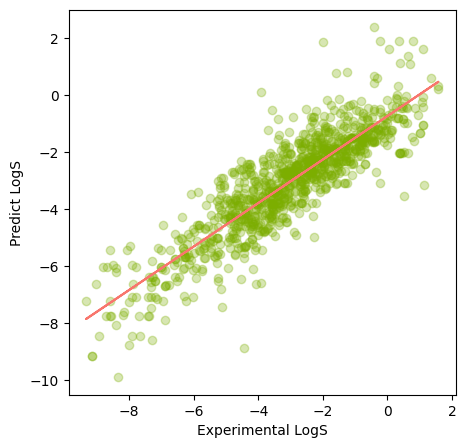

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')